In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['figure.dpi'] = 70

# Introduction

**Overall goal:**

Investigation of how effective the campaigns are in which classes

**Section 01 :**
Are there any nulls or duplicate data in the data?

**Section 02**: **Statistical Analysis and Data Visualization**

Detailed examination of the data
A large-scale data visualization of columns

**Column Details:**

***Income*** :  customer's yearly household income

***Kidhome*** : number of small children in customer's household

***Teenhome*** : number of teenagers in customer's household

***Recency*** : number of days since the last purchase

***MntWines*** : amount spent on wines in the last 2 years

***MntFruits*** : amount spent on fruits in the last 2 years

***MntMeatProducts*** : amount spent on meat products in the last 2 years

***MntFishProducts*** : amount spent on fish products in the last 2 years

***MntSweetProducts*** : amount spent on sweet products in the last 2 years

***MntGoldProds*** : amount spent on gold products in the last 2 years

***NumDealsPurchases*** : number of purchases made with discount

***NumWebPurchases*** : number of purchases made through company's web site

***NumCatalogPurchases*** : number of purchases made using catalogue

***NumStorePurchases*** : number of purchases made directly in stores

***NumWebVisitsMonth*** :  number of visits to company's web site in the last month

***AcceptedCmp3*** : if costumer accepted the offer in the 3rd campaign, 0 otherwise

***AcceptedCmp4*** : 1 if costumer accepted the offer in the 4th campaign, 0 otherwise

***AcceptedCmp5*** : 1 if costumer accepted the offer in the 5th campaign, 0 otherwise

***AcceptedCmp1*** : 1 if costumer accepted the offer in the 1st campaign, 0 otherwise

***AcceptedCmp2*** : 1 if costumer accepted the offer in the 2nd campaign, 0 otherwise

***Complain*** : 1 if costumer complained in the last 2 years

***Response (target)*** : 1 if costumer accepted the offer in the last campaign, 0 otherwise

***Marital*** : customer's marital status

***Education*** : customer's level of education

***DtCustomer*** : date of customer's enrollment with the company

# Section 1

In [502]:
df = pd.read_csv("marketing_data.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [504]:
df.shape

(2240, 28)

In [505]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

**We discarded null values**

In [506]:
df.dropna(inplace = True)

In [507]:
df.isnull().sum().sum()

0

In [508]:
df.duplicated().sum()

0

**no copy value**

In [509]:
df.columns = df.columns.str.replace(" ", "")

In [510]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**We removed the space in the Income'n press**

**Let's convert the Income column to object it Float**

In [511]:
df.Income = df.Income.str.replace("$", "").str.replace(",", "").astype(float)

In [512]:
df.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

**Let's make it datetime as Dt_Customer object ve Year**

In [513]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [514]:
df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

**Let's replace 0's with No, 1's with Yes in Complain**

**Let's change the response to AcceptedCmp6**

In [515]:
df.Complain = df.Complain.apply(lambda x : "Yes" if x == 1 else "No")
df.rename(columns = {"Response" : "AcceptedCmp6"}, inplace = True)

In [516]:
df.Complain.unique()

array(['No', 'Yes'], dtype=object)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

**All edits are finished.**

# Session 02

In [518]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,No,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,No,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,No,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,No,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,No,SP


## Income

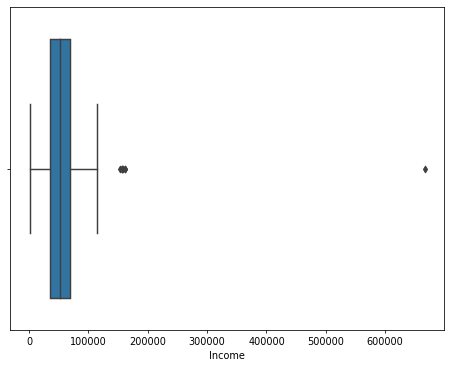

In [519]:
sns.boxplot(df.Income);

In [520]:
Q3 = df.Income.describe()['75%']
IQR = stats.iqr(df.Income)

In [521]:
df.Income[df.Income > (Q3 + 1.5 * IQR)]

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

**527. index not acceptable**

In [522]:
df.drop(index = 527, inplace = True)

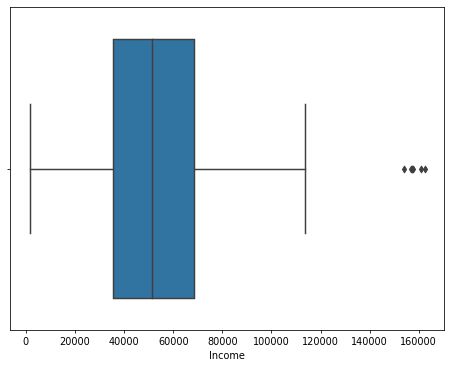

In [523]:
sns.boxplot(df.Income);

In [524]:
df.Income.describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

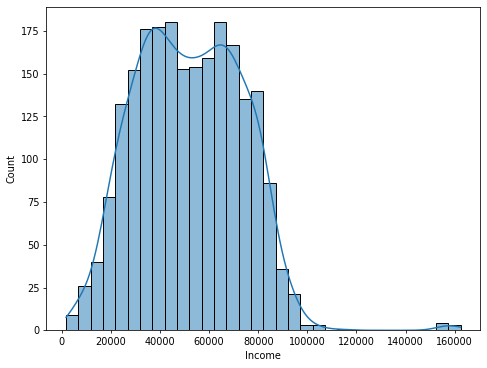

In [525]:
sns.histplot(df.Income, kde = True);

**The general density is between 40-60 thousand**

In [526]:
df["Income_Level"] = df.Income.apply(lambda x : "Low" if x < 35000 
                                     else "Medium" if (x >= 35000 and x < 70000) 
                                     else "High")

**0-35000 Low**

**35000-70000 Medium**

**80000+ High**

In [527]:
df.Income_Level.value_counts()

Medium    1159
Low        549
High       507
Name: Income_Level, dtype: int64

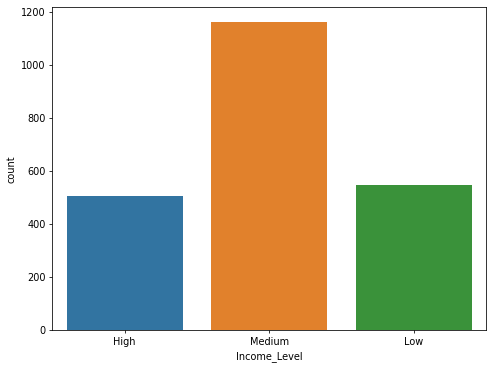

In [528]:
sns.countplot(df.Income_Level);

**Very High very little**

In [529]:
df["TotalKid"] = df.Kidhome + df.Teenhome

In [530]:
df.groupby("TotalKid").Income.mean()

TotalKid
0    65705.565561
1    47158.646057
2    44612.310096
3    46677.000000
Name: Income, dtype: float64

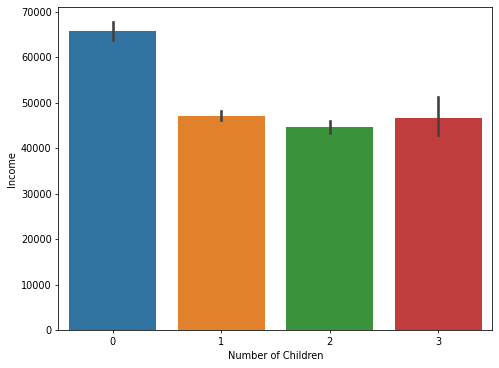

In [531]:
sns.barplot(df.TotalKid, df.Income)
plt.xlabel("Number of Children");

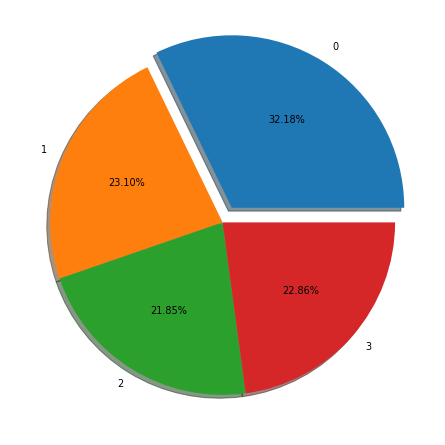

In [532]:
plt.figure(figsize = (10,8))
plt.pie(x = df.groupby("TotalKid").Income.mean().values,
        labels = df.groupby("TotalKid").Income.mean().index,
        autopct="%.2f%%",
        explode = [0.1,0,0,0],
        shadow = True);

**No link found between income and number of children but families with no children are more affluent.**

In [533]:
df.Income_Level.value_counts()

Medium    1159
Low        549
High       507
Name: Income_Level, dtype: int64

In [534]:
df[df.TotalKid != 0].groupby("Income_Level").TotalKid.count()

Income_Level
High      147
Low       448
Medium    987
Name: TotalKid, dtype: int64

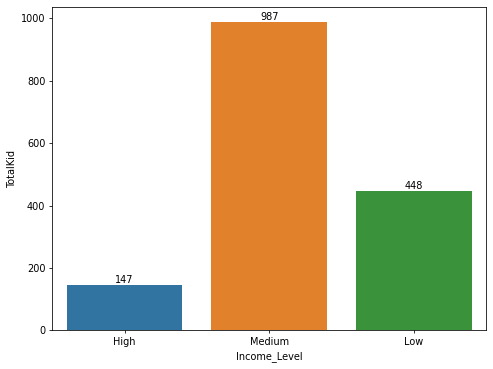

In [535]:
ax = sns.barplot(x = "Income_Level", y = "TotalKid", estimator=np.count_nonzero, data = df, ci = None)

for i in ax.containers :
    plt.bar_label(i);

**Very High winners have very few children.**

In [536]:
df.groupby("Income_Level").TotalKid.value_counts()

Income_Level  TotalKid
High          0           360
              1           123
              2            20
              3             4
Low           1           336
              0           101
              2           101
              3            11
Medium        1           657
              2           295
              0           172
              3            35
Name: TotalKid, dtype: int64

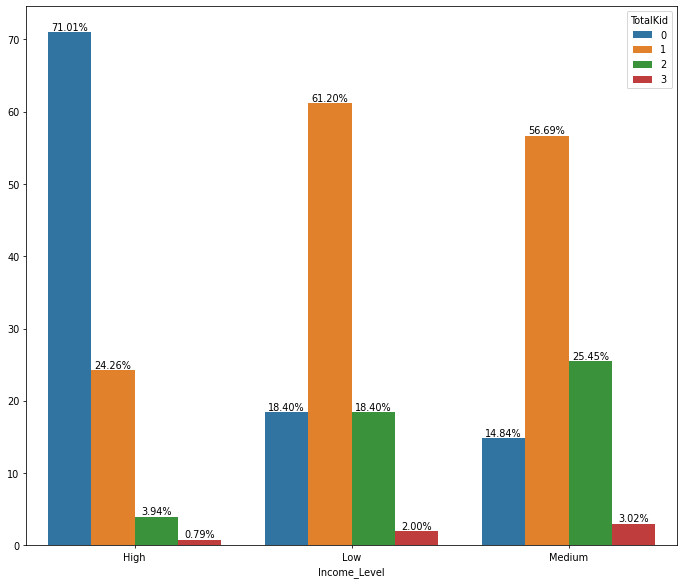

In [537]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = (df.groupby("Income_Level").TotalKid.value_counts(normalize = True) * 100).index.get_level_values(0),
            hue = (df.groupby("Income_Level").TotalKid.value_counts(normalize = True) * 100).index.get_level_values(1),
            y = (df.groupby("Income_Level").TotalKid.value_counts(normalize = True) * 100).values)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%");

**majority of high-income families have no children**

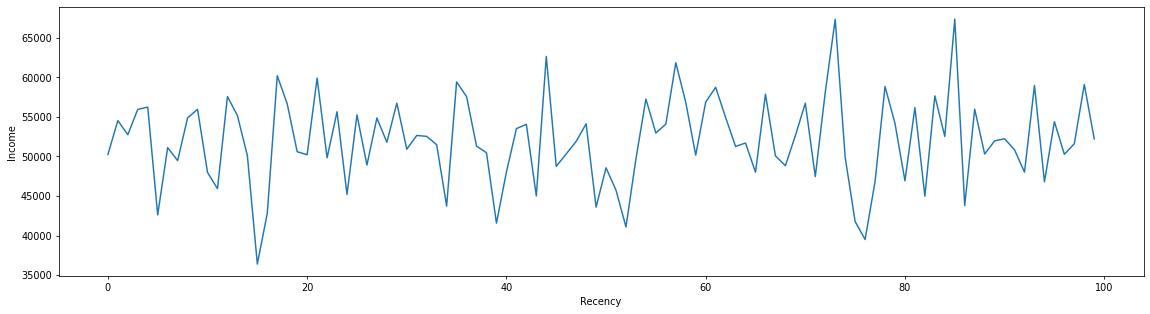

In [538]:
plt.figure(figsize = (20,5))
sns.lineplot(x = df.Recency, y = df.Income, ci = None);

**No link found between income and recency**

In [539]:
df["MntTotal"] = df[df.columns[df.columns.str.match("Mnt")]].sum(axis = 1)

**MntTotal : total expenditure**

In [540]:
df.MntTotal.corr(df.Income)

0.7926502833622053

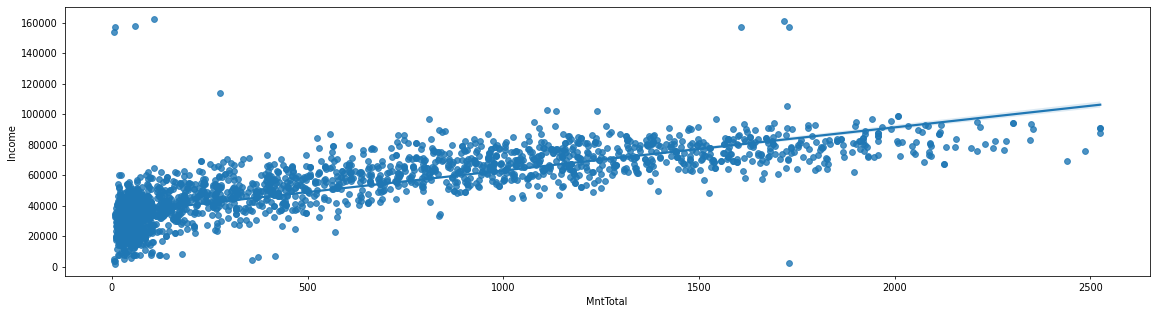

In [541]:
plt.figure(figsize = (20,5))
sns.regplot(x = df.MntTotal, y= df.Income);

**There is a high positive correlation between total expenditure and income level**

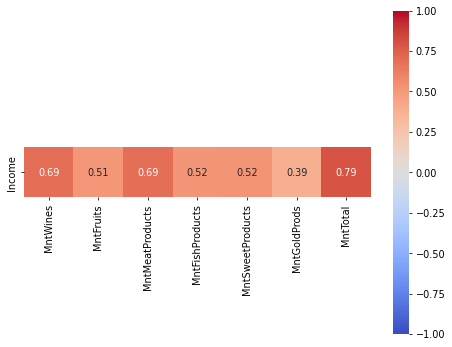

In [542]:
sns.heatmap(df.corr().loc[["Income"]][df[df.columns[df.columns.str.match("Mnt")]].columns], 
            annot=True, vmax=1, vmin = -1, cmap = "coolwarm", square = True);

**Meat eaters and wine drinking are related to income level**

In [543]:
df.groupby("Education").Income.mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52169.749776
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

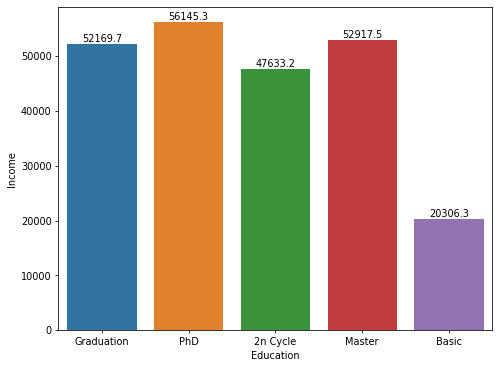

In [544]:
plt.figure(figsize = (8,6))
ax = sns.barplot(df.Education, df.Income, ci = None)

for i in ax.containers :
    plt.bar_label(i)

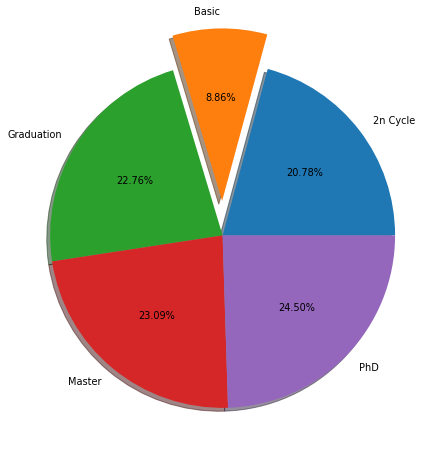

In [545]:
plt.figure(figsize = (10,8))
plt.pie(x = df.groupby("Education").Income.mean().values,
        labels = df.groupby("Education").Income.mean().index,
        autopct="%.2f%%",
        explode = [0,0.2,0,0,0],
        shadow = True);

**The low level of education is reflected in the income level.**

In [546]:
df.Education.value_counts()

Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [547]:
df.groupby("Income_Level").Education.value_counts()

Income_Level  Education 
High          Graduation    277
              PhD           111
              Master         79
              2n Cycle       40
Low           Graduation    286
              PhD            72
              Master         70
              2n Cycle       67
              Basic          54
Medium        Graduation    552
              PhD           298
              Master        216
              2n Cycle       93
Name: Education, dtype: int64

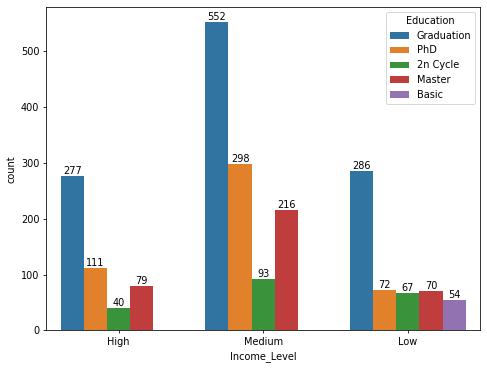

In [548]:
ax = sns.countplot(x = df.Income_Level, hue = df.Education)

for i in ax.containers :
    plt.bar_label(i)

**Basic Education stands out at Low Income Level**

In [549]:
df.groupby("Complain").Income.mean()

Complain
No     52034.254786
Yes    45242.285714
Name: Income, dtype: float64

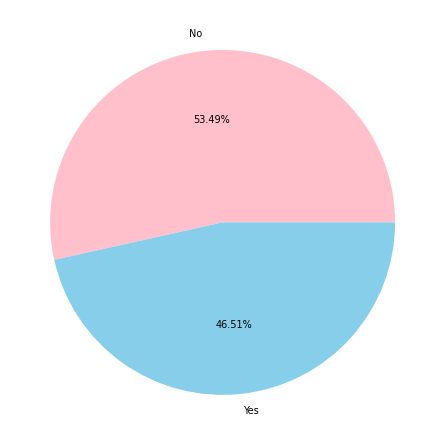

In [550]:
plt.figure(figsize = (10,8))
plt.pie(x = df.groupby("Complain").Income.mean().values,
        labels = df.groupby("Complain").Income.mean().index,
        autopct="%.2f%%",
        colors = ["pink", "skyblue"]);

**Complainers have a slightly lower income level**

In [551]:
df.groupby("Income_Level").Complain.value_counts()

Income_Level  Complain
High          No           505
              Yes            2
Low           No           544
              Yes            5
Medium        No          1145
              Yes           14
Name: Complain, dtype: int64

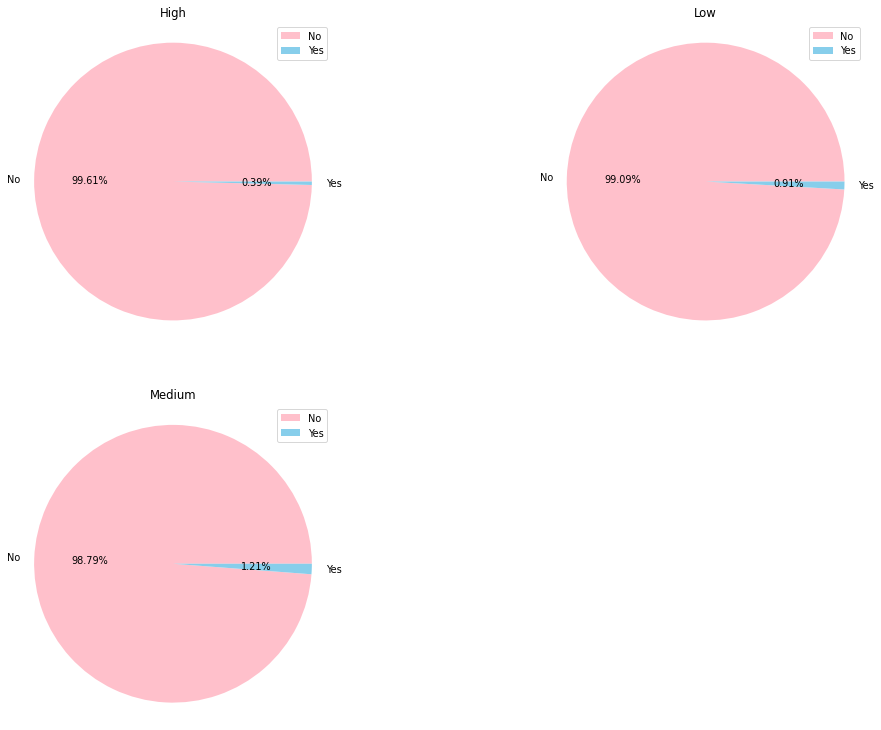

In [552]:
fig, axes = plt.subplots(figsize = (18,13))
df.groupby("Complain").Income_Level.value_counts().unstack().plot(kind = "pie", 
                                                                  subplots = True,
                                                                  layout = (2,2),
                                                                  ax = axes,
                                                                  colors = ["pink", "skyblue"],
                                                                  radius = 1.09,
                                                                  title = df.groupby("Income_Level").Complain.value_counts().unstack().index.tolist(),
                                                                  ylabel = "",
                                                                  autopct = "%.2f%%",);

**very high customer satisfaction**

In [553]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

**There are so many different variables. Let's group as alone and together**

In [554]:
df.Marital_Status = df.Marital_Status.apply(lambda x : "Together" if (x == "Married" or x == "Together")
                                            else "Alone")

In [555]:
df.Marital_Status.value_counts()

Together    1429
Alone        786
Name: Marital_Status, dtype: int64

In [556]:
df.groupby("Marital_Status").Income.mean()

Marital_Status
Alone       52088.945293
Together    51904.361092
Name: Income, dtype: float64

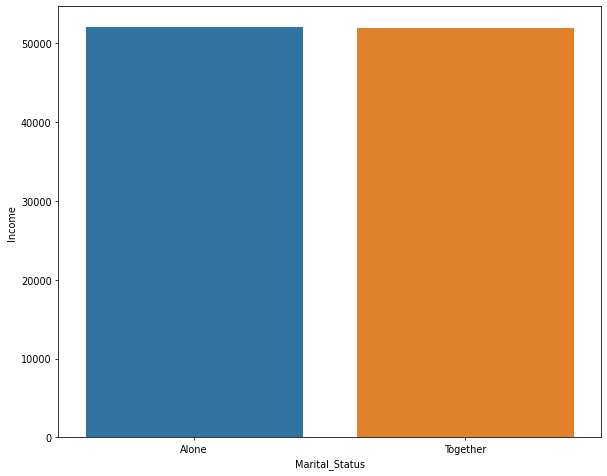

In [557]:
plt.figure(figsize = (10,8))
sns.barplot(x = df.Marital_Status, y = df.Income, ci = None);

**Averages are close**

In [558]:
df.groupby("Income_Level").Marital_Status.value_counts()

Income_Level  Marital_Status
High          Together          322
              Alone             185
Low           Together          358
              Alone             191
Medium        Together          749
              Alone             410
Name: Marital_Status, dtype: int64

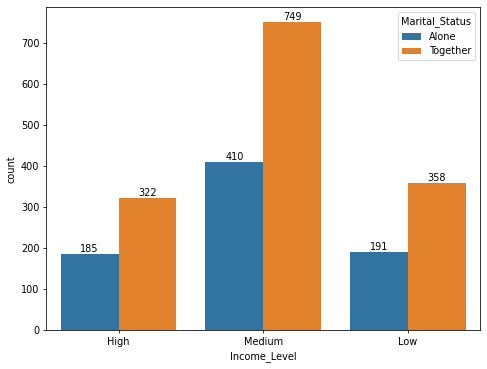

In [559]:
ax = sns.countplot(x = df.Income_Level, hue = df.Marital_Status)

for i in ax.containers :
    plt.bar_label(i)

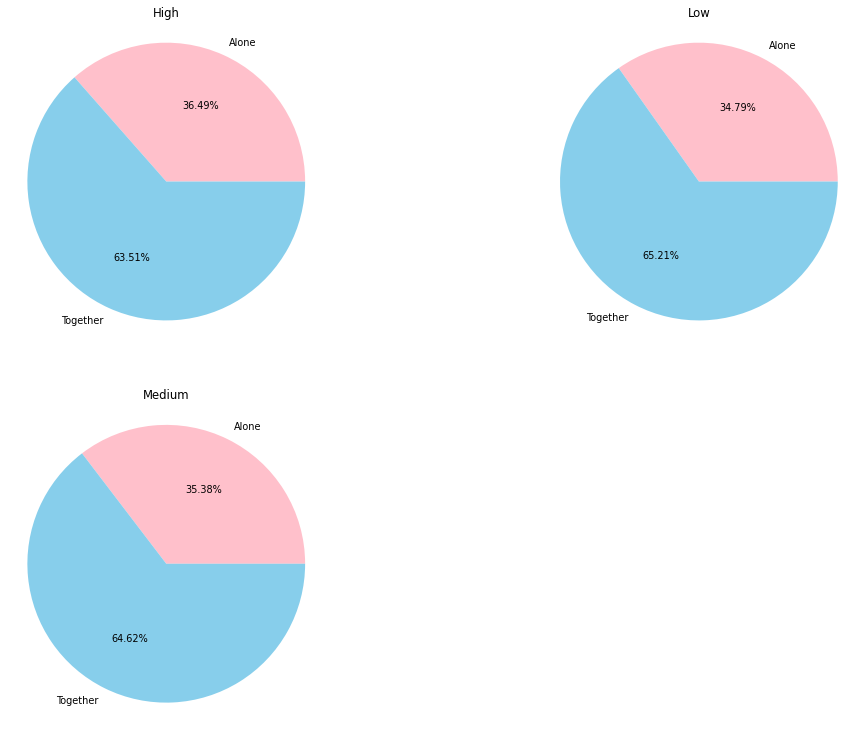

In [560]:
fig, axes = plt.subplots(figsize = (18,13))
df.groupby("Marital_Status").Income_Level.value_counts().unstack().plot(kind = "pie", 
                                                                        layout = (2,2),
                                                                        ax = axes,
                                                                        colors = ["pink", "skyblue"],
                                                                        radius = 1.09,
                                                                        title = df.groupby("Income_Level").Marital_Status.value_counts().unstack().index.tolist(),
                                                                        ylabel = "",
                                                                        autopct = "%.2f%%",
                                                                        legend = False,
                                                                        subplots=True);

**Alone and Together rates are close at all 3 levels**

In [561]:
df["Total_Cmp"] = np.sum(df[df.columns[df.columns.str.contains("Cmp")]], axis = 1)

In [562]:
df.Total_Cmp.unique()

array([1, 2, 0, 3, 5, 4], dtype=int64)

In [563]:
df.groupby("Total_Cmp").Income.mean()

Total_Cmp
0    48293.000000
1    56823.373984
2    61659.035971
3    78462.352941
4    82143.277778
5    86434.400000
Name: Income, dtype: float64

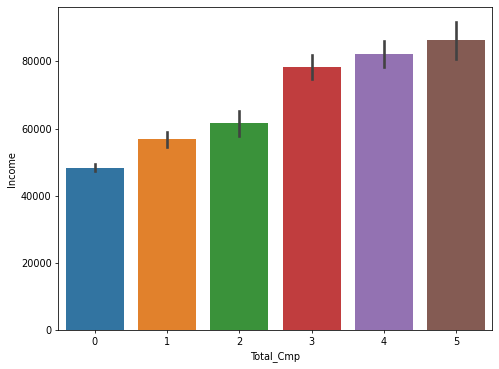

In [564]:
sns.barplot(x = df.Total_Cmp, y = df.Income);

**There is an increase in the number of participants in the Total Campaign by income level**

In [565]:
df.groupby("Income_Level").Total_Cmp.value_counts()

Income_Level  Total_Cmp
High          0            244
              1            116
              2             65
              3             41
              4             32
              5              9
Low           0            471
              1             59
              2             19
Medium        0            895
              1            194
              2             55
              3             10
              4              4
              5              1
Name: Total_Cmp, dtype: int64

In [566]:
df.groupby("Income_Level").Total_Cmp.value_counts(normalize = True) * 100

Income_Level  Total_Cmp
High          0            48.126233
              1            22.879684
              2            12.820513
              3             8.086785
              4             6.311637
              5             1.775148
Low           0            85.792350
              1            10.746812
              2             3.460838
Medium        0            77.221743
              1            16.738568
              2             4.745470
              3             0.862813
              4             0.345125
              5             0.086281
Name: Total_Cmp, dtype: float64

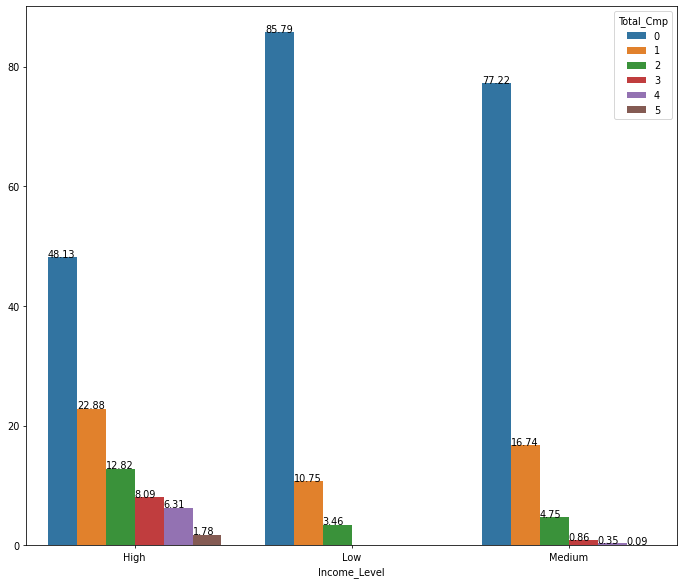

In [567]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = (df.groupby("Income_Level").Total_Cmp.value_counts(normalize = True) * 100).index.get_level_values(0),
            hue = (df.groupby("Income_Level").Total_Cmp.value_counts(normalize = True) * 100).index.get_level_values(1),
            y = (df.groupby("Income_Level").Total_Cmp.value_counts(normalize = True) * 100).values)

for i in ax.patches :
    ax.annotate(round(i.get_height(),2), (i.get_x(), i.get_height()))

**The rate of people who do not participate in the campaign in the high-income group is lower than in other groups.**

In [568]:
df.AcceptedCmp1.value_counts(normalize = True) *100

0    93.589165
1     6.410835
Name: AcceptedCmp1, dtype: float64

In [569]:
df.groupby("Income_Level").AcceptedCmp1.value_counts(normalize = True) *100

Income_Level  AcceptedCmp1
High          0                76.725838
              1                23.274162
Low           0               100.000000
Medium        0                97.929249
              1                 2.070751
Name: AcceptedCmp1, dtype: float64

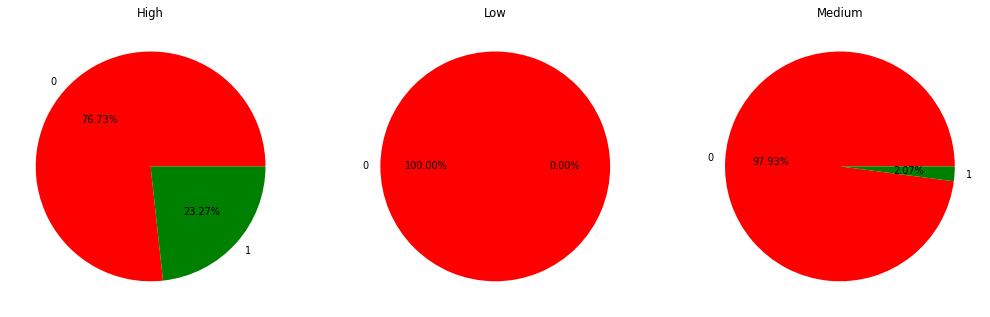

In [570]:
(df.groupby("AcceptedCmp1").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp1.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**As the income level decreased, the number of participation in the 1st campaign decreased.**

In [571]:
df.AcceptedCmp2.value_counts(normalize = True) *100

0    98.645598
1     1.354402
Name: AcceptedCmp2, dtype: float64

In [572]:
df.groupby("Income_Level").AcceptedCmp2.value_counts(normalize = True) *100

Income_Level  AcceptedCmp2
High          0                96.844181
              1                 3.155819
Low           0               100.000000
Medium        0                98.792062
              1                 1.207938
Name: AcceptedCmp2, dtype: float64

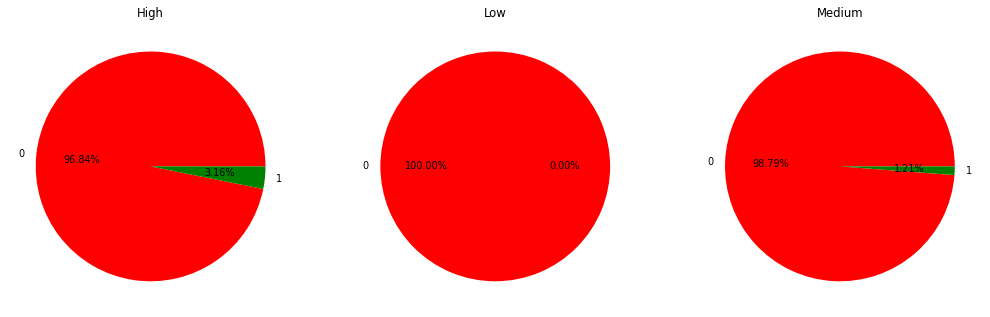

In [573]:
(df.groupby("AcceptedCmp2").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp2.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**Participation in the 2nd Campaign is quite low at all income levels.**

In [574]:
df.AcceptedCmp3.value_counts(normalize = True) *100

0    92.641084
1     7.358916
Name: AcceptedCmp3, dtype: float64

In [575]:
df.groupby("Income_Level").AcceptedCmp3.value_counts(normalize = True) *100

Income_Level  AcceptedCmp3
High          0               91.518738
              1                8.481262
Low           0               92.531876
              1                7.468124
Medium        0               93.183779
              1                6.816221
Name: AcceptedCmp3, dtype: float64

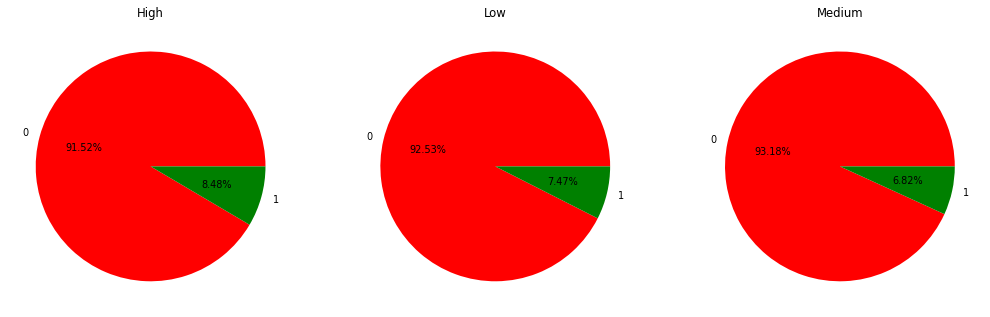

In [576]:
(df.groupby("AcceptedCmp3").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp3.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**Participation rates at all income levels are very close**

In [577]:
df.AcceptedCmp4.value_counts(normalize = True) *100

0    92.595937
1     7.404063
Name: AcceptedCmp4, dtype: float64

In [578]:
df.groupby("Income_Level").AcceptedCmp4.value_counts(normalize = True) *100

Income_Level  AcceptedCmp4
High          0               85.404339
              1               14.595661
Low           0               99.817851
              1                0.182149
Medium        0               92.320966
              1                7.679034
Name: AcceptedCmp4, dtype: float64

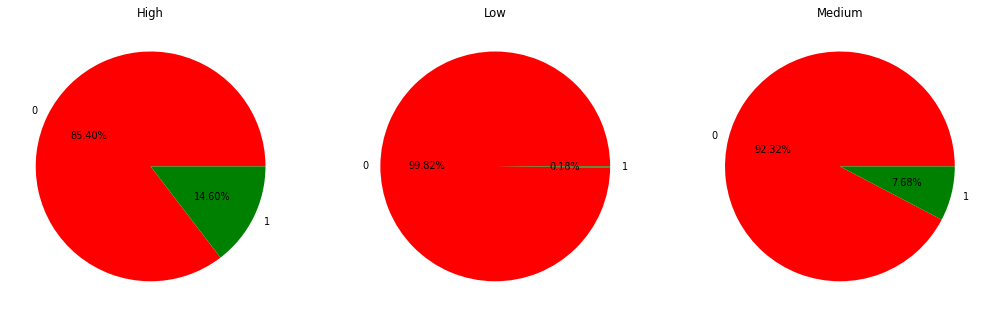

In [579]:
(df.groupby("AcceptedCmp4").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp4.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**Rates are quite low in the low-income group**

In [580]:
df.AcceptedCmp5.value_counts(normalize = True) *100

0    92.68623
1     7.31377
Name: AcceptedCmp5, dtype: float64

In [581]:
df.groupby("Income_Level").AcceptedCmp5.value_counts(normalize = True) *100

Income_Level  AcceptedCmp5
High          0                70.611440
              1                29.388560
Low           0               100.000000
Medium        0                98.878343
              1                 1.121657
Name: AcceptedCmp5, dtype: float64

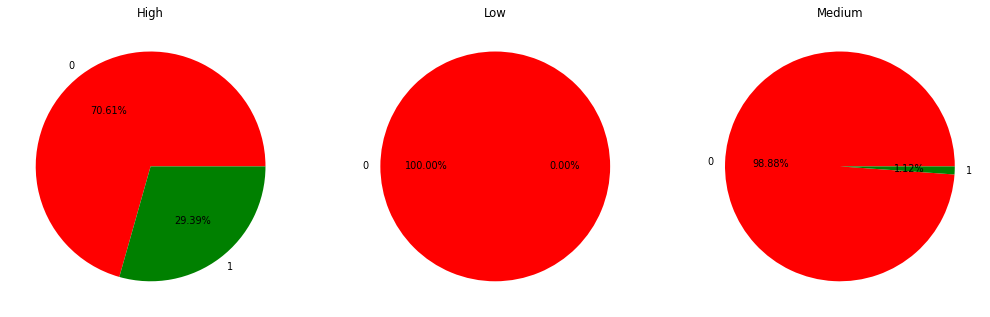

In [582]:
(df.groupby("AcceptedCmp5").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp5.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**This campaign attracted the high income group**

In [583]:
df.AcceptedCmp6.value_counts(normalize = True) *100

0    84.96614
1    15.03386
Name: AcceptedCmp6, dtype: float64

In [584]:
df.groupby("Income_Level").AcceptedCmp6.value_counts(normalize = True) *100

Income_Level  AcceptedCmp6
High          0               71.992110
              1               28.007890
Low           0               89.981785
              1               10.018215
Medium        0               88.265746
              1               11.734254
Name: AcceptedCmp6, dtype: float64

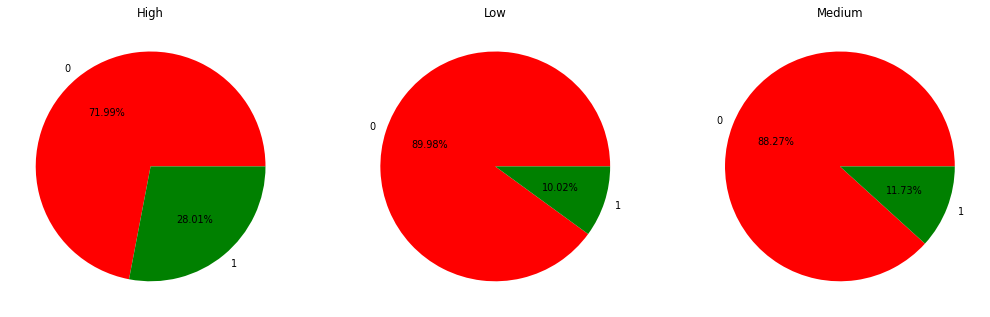

In [585]:
(df.groupby("AcceptedCmp6").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").AcceptedCmp6.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green"]);

**The most participation is in this campaign**

In [586]:
df.groupby("Income_Level").NumDealsPurchases.sum()

Income_Level
High       707
Low       1124
Medium    3314
Name: NumDealsPurchases, dtype: int64

In [587]:
df.groupby("Income_Level").NumDealsPurchases.sum() / df.NumDealsPurchases.sum() * 100

Income_Level
High      13.741497
Low       21.846453
Medium    64.412051
Name: NumDealsPurchases, dtype: float64

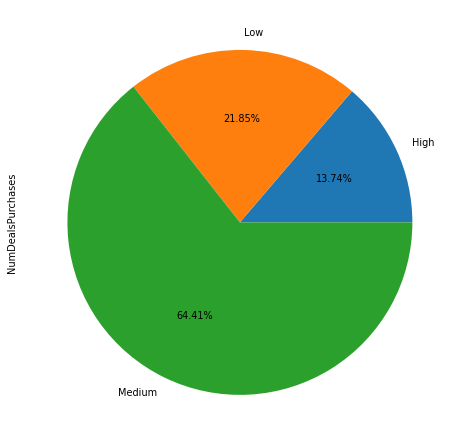

In [588]:
(df.groupby("Income_Level").NumDealsPurchases.sum() / df.NumDealsPurchases.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**Discount shopping rates are higher for middle-income people**

In [589]:
df.groupby("Income_Level").NumWebPurchases.sum() / df.NumWebPurchases.sum() * 100

Income_Level
High      29.458564
Low       12.132597
Medium    58.408840
Name: NumWebPurchases, dtype: float64

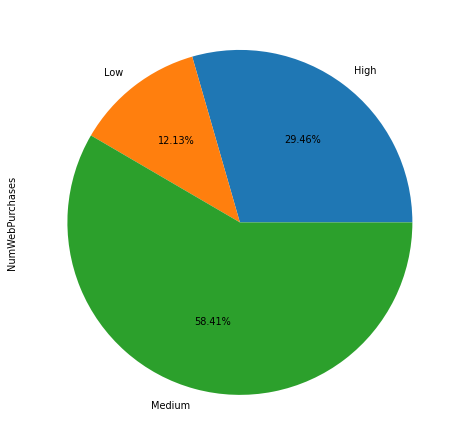

In [590]:
(df.groupby("Income_Level").NumWebPurchases.sum() / df.NumWebPurchases.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**The people who shop the most online are at medium level.**

In [591]:
df.groupby("Income_Level").NumCatalogPurchases.sum() / df.NumCatalogPurchases.sum() * 100

Income_Level
High      49.949307
Low        4.376479
Medium    45.674214
Name: NumCatalogPurchases, dtype: float64

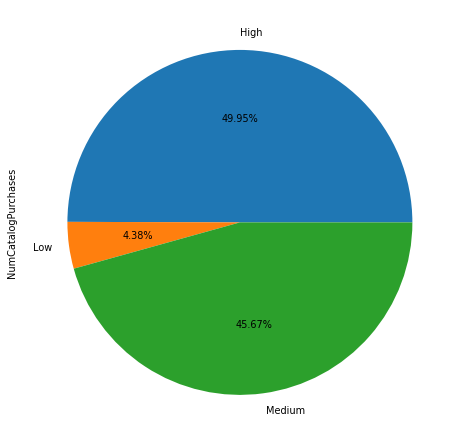

In [592]:
(df.groupby("Income_Level").NumCatalogPurchases.sum() / df.NumCatalogPurchases.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**The income levels of the catalog shoppers are as shown**

In [593]:
df.groupby("Income_Level").NumStorePurchases.sum() / df.NumStorePurchases.sum() * 100

Income_Level
High      32.796452
Low       12.628385
Medium    54.575163
Name: NumStorePurchases, dtype: float64

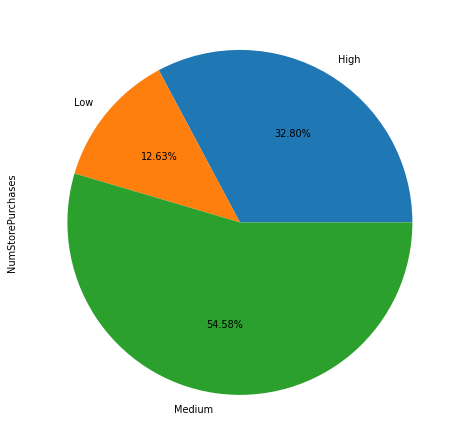

In [594]:
(df.groupby("Income_Level").NumStorePurchases.sum() / df.NumStorePurchases.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**"Medium" level buyed more from the store**

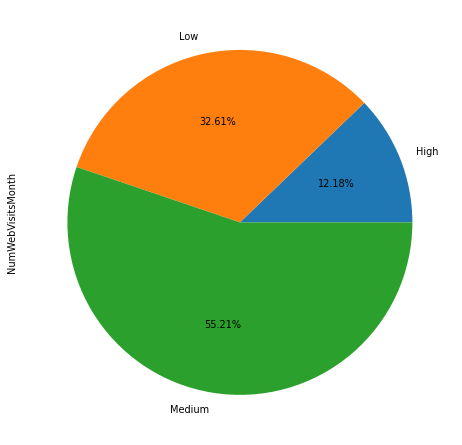

In [595]:
(df.groupby("Income_Level").NumWebVisitsMonth.sum() / df.NumWebVisitsMonth.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**Last month sales rates**

In [596]:
df["Total_Purchases"] = df.NumWebPurchases + df.NumStorePurchases

In [597]:
df.groupby("Income_Level").Total_Purchases.sum() / df.Total_Purchases.sum() * 100

Income_Level
High      31.417222
Low       12.423523
Medium    56.159255
Name: Total_Purchases, dtype: float64

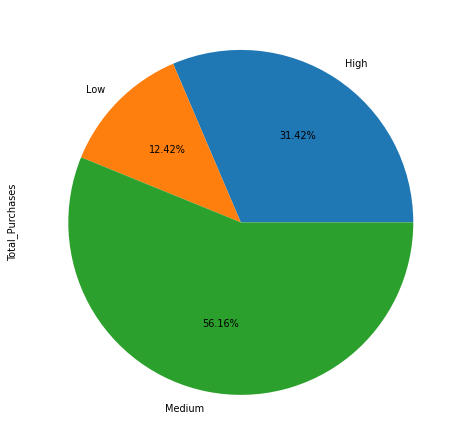

In [598]:
(df.groupby("Income_Level").Total_Purchases.sum() / df.Total_Purchases.sum()).plot(kind = "pie",
                                                                                       subplots = True,
                                                                                       autopct = "%.2f%%",
                                                                                       figsize = (10,8));

**Medium is at the forefront in general shopping**

In [599]:
df.groupby("Income_Level").MntTotal.sum() / df.MntTotal.sum() * 100

Income_Level
High      51.985144
Low        3.272929
Medium    44.741926
Name: MntTotal, dtype: float64

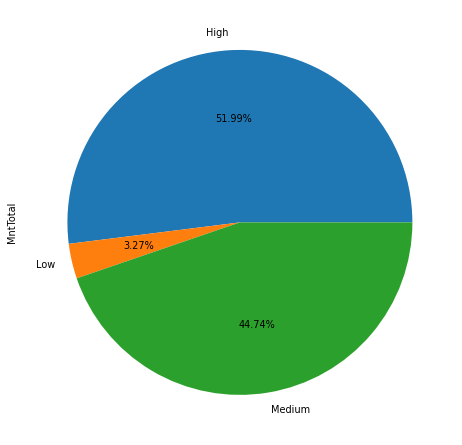

In [600]:
(df.groupby("Income_Level").MntTotal.sum() / df.MntTotal.sum()).plot(kind = "pie",
                                                                     subplots = True,
                                                                     autopct = "%.2f%%",
                                                                     figsize = (10,8));

**While the total number of purchases is higher in "Medium", the total income is higher in "High"**

In [601]:
df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2215, dtype: datetime64[ns]

**Only the year part is enough for us**

In [602]:
df.Dt_Customer = df.Dt_Customer.dt.year

In [603]:
df.Dt_Customer.unique()

array([2014, 2013, 2012], dtype=int64)

In [604]:
df.groupby("Dt_Customer").Income.mean()

Dt_Customer
2012    51150.236735
2013    51907.967577
2014    52827.285714
Name: Income, dtype: float64

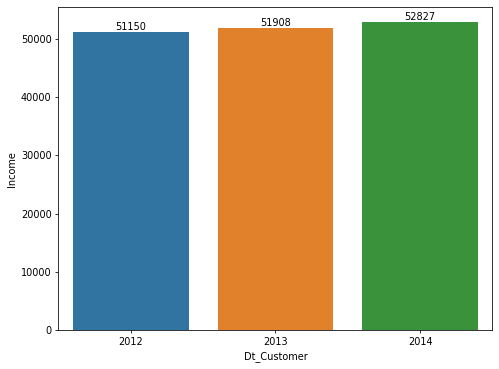

In [605]:
ax = sns.barplot(x = df.Dt_Customer, y = df.Income, ci = None)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.0f")

**Yıllara göre kayıt olan müşterilerin gelir ortalamaları neredeyse aynıdır**

In [606]:
df.groupby("Dt_Customer").Income_Level.value_counts()

Dt_Customer  Income_Level
2012         Medium          262
             Low             127
             High            101
2013         Medium          623
             Low             284
             High            265
2014         Medium          274
             High            141
             Low             138
Name: Income_Level, dtype: int64

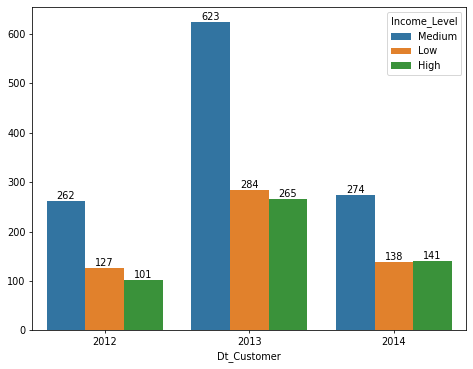

In [607]:
ax = sns.barplot(x = df.groupby("Dt_Customer").Income_Level.value_counts().index.get_level_values(0),
            y = df.groupby("Dt_Customer").Income_Level.value_counts().values,
            hue = df.groupby("Dt_Customer").Income_Level.value_counts().index.get_level_values(1))

for i in ax.containers :
    plt.bar_label(i, fmt = "%.0f")

**3 yılda da Medium gelir seviyesine sahip kişilerin kayıt sayıları oldukca fazladır**

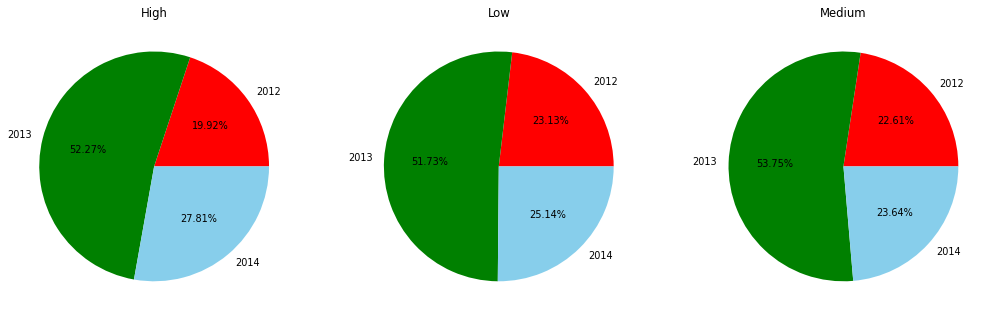

In [608]:
(df.groupby("Dt_Customer").Income_Level.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        title = (df.groupby("Income_Level").Dt_Customer.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green", "skyblue"]);

**Gelir seviyeleri arasında katılım yıllarına göre herhangi bir bağlantı yoktur**

In [609]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country', 'Income_Level',
       'TotalKid', 'MntTotal', 'Total_Cmp', 'Total_Purchases'],
      dtype='object')

# Kidhome + Teenhome = TotalKid

**Kidhome ve Teenhome sütünlarının birleşimi olan TotalKid sutununu ınceleyelim.**

In [610]:
df.TotalKid.value_counts()

1    1116
0     633
2     416
3      50
Name: TotalKid, dtype: int64

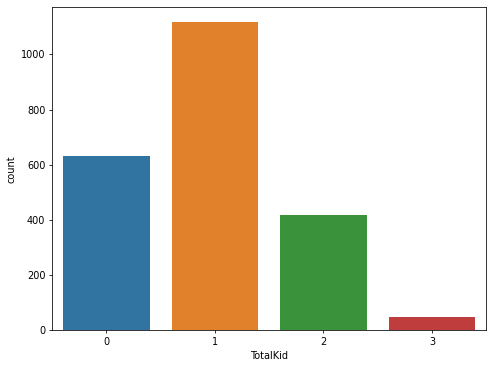

In [611]:
sns.countplot(df.TotalKid);

**1 cocuklu aıleler oldukca fazla**

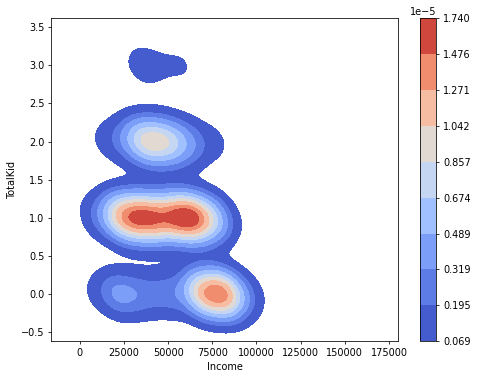

In [612]:
sns.kdeplot(x = df.Income, y = df.TotalKid, fill = True, cbar = True, cmap = "coolwarm");

**Gelir seviyesi 25.000-75.000 aralıgı ile 1 cocuk yapma arasında güçlü bir ilişki var**

In [613]:
df.Income.corr(df.TotalKid)

-0.3440351823449188

**Fakat cocuk sayısı ile gelir ile arasında zayıf negatif bir corelasyon vardır**

In [614]:
df.groupby("TotalKid").Income_Level.value_counts(normalize = True)

TotalKid  Income_Level
0         High            0.568720
          Medium          0.271722
          Low             0.159558
1         Medium          0.588710
          Low             0.301075
          High            0.110215
2         Medium          0.709135
          Low             0.242788
          High            0.048077
3         Medium          0.700000
          Low             0.220000
          High            0.080000
Name: Income_Level, dtype: float64

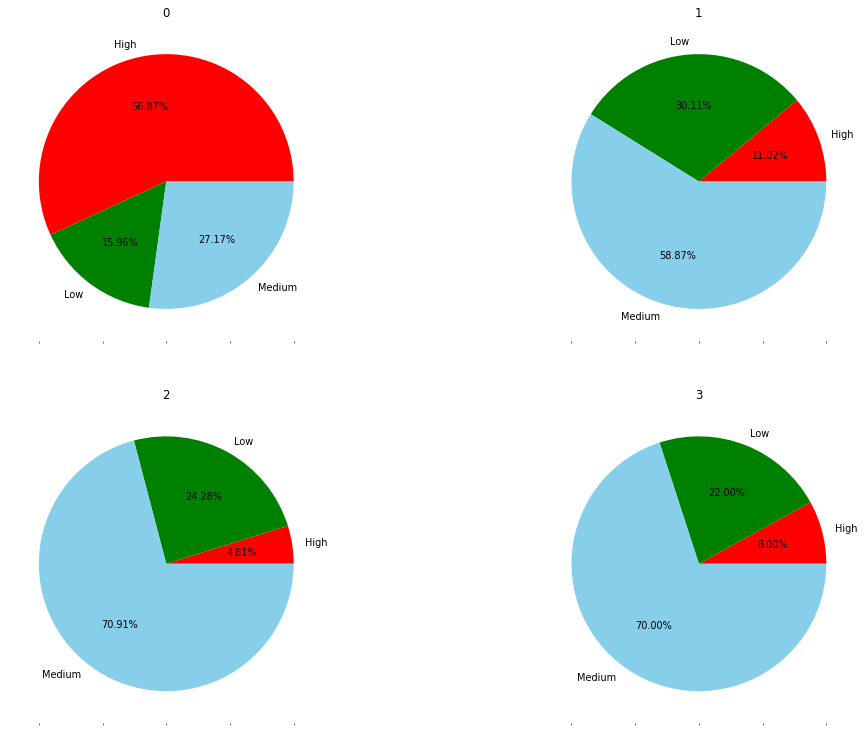

In [615]:
(df.groupby("Income_Level").TotalKid.value_counts()).unstack().plot(kind = "pie",
                                                                        subplots = True,
                                                                        legend = False,
                                                                        ylabel = "",
                                                                        layout = (2,2),
                                                                        title = (df.groupby("TotalKid").Income_Level.value_counts()).unstack().index.tolist(),
                                                                        figsize = (18,13),
                                                                        autopct = "%.2f%%",
                                                                        colors = ["red", "green", "skyblue"]);

**Fakat cocuk sayısı arttıkca gelir düzeyinde bir düşüş söz konusu**

In [616]:
df.TotalKid.value_counts()

1    1116
0     633
2     416
3      50
Name: TotalKid, dtype: int64

**Müşterilerin cocuk sayıları arttıkca sayıları azalmaktadır**

In [676]:
df.groupby("TotalKid").Total_Cmp.sum()

TotalKid
0    547
1    337
2    102
3      8
Name: Total_Cmp, dtype: int64

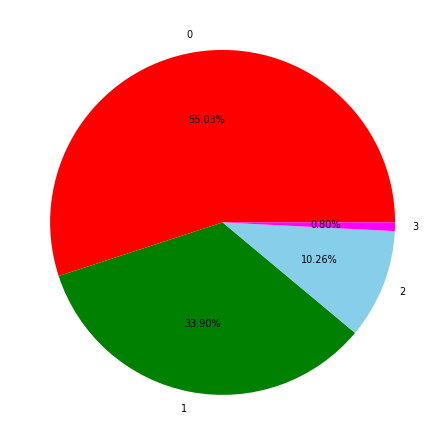

In [670]:
df.groupby("TotalKid").Total_Cmp.sum().plot(kind = "pie",
                                            legend = False,
                                            ylabel = "",
                                            layout = (2,2),
                                            figsize = (10,8),
                                            autopct = "%.2f%%",
                                            colors = ["red", "green", "skyblue", "magenta"]);

**Hiç cocugu olmayan ailelerde toplam kampanyaya katılış oranları daha fazladır**

In [619]:
df.groupby("TotalKid").NumDealsPurchases.sum()

TotalKid
0     723
1    2759
2    1483
3     180
Name: NumDealsPurchases, dtype: int64

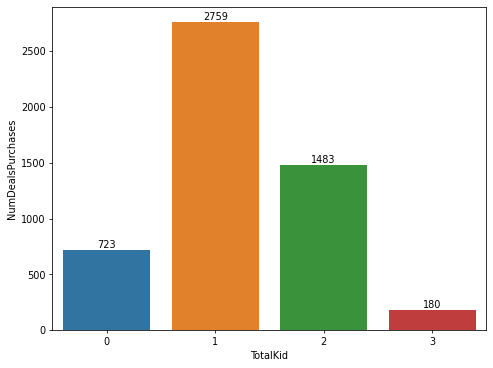

In [620]:
ax = sns.barplot(x = "TotalKid", y = "NumDealsPurchases", estimator=np.sum, data = df, ci = None)

for i in ax.containers :
    plt.bar_label(i)

**1 cocuklu ailelerde indirimli alışveriş sayıları ön planda**

In [621]:
df.TotalKid.value_counts() / df.groupby("TotalKid").NumDealsPurchases.sum() * 100

0    87.551867
1    40.449438
2    28.051247
3    27.777778
dtype: float64

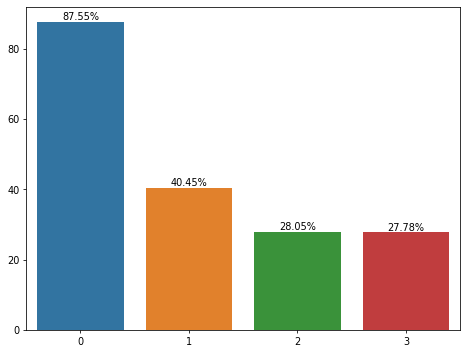

In [622]:
ax = sns.barplot(x = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumDealsPurchases.sum() * 100).index,
            y = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumDealsPurchases.sum() * 100).values)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")

**Fakat oranlara baktıgımız zaman Hiç cocugu olmayan aileler indirimli alışverişlere daha çok ilgi göstermiştir**

In [623]:
df.groupby("TotalKid").NumWebPurchases.sum()

TotalKid
0    2789
1    4768
2    1352
3     141
Name: NumWebPurchases, dtype: int64

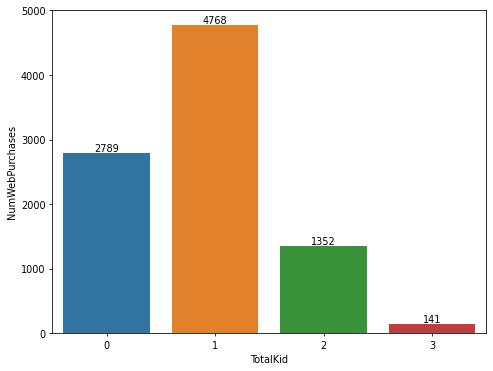

In [624]:
ax = sns.barplot(x = "TotalKid", y = "NumWebPurchases", estimator=np.sum, data = df, ci = None)

for i in ax.containers :
    plt.bar_label(i)

**İnternetten yapılan alışverişlerde de 1.cocuklu aileler ön planda**

In [625]:
df.TotalKid.value_counts() / df.groupby("TotalKid").NumWebPurchases.sum() * 100

0    22.696307
1    23.406040
2    30.769231
3    35.460993
dtype: float64

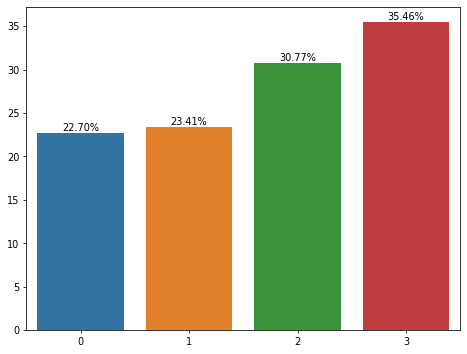

In [626]:
ax = sns.barplot(x = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumWebPurchases.sum() * 100).index,
            y = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumWebPurchases.sum() * 100).values)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")

**Fakat oranlara baktıgımız zaman 3 cocugu olmayan aileler internet alışverişlere daha çok ilgi göstermiştir**

In [627]:
df.groupby("TotalKid").NumCatalogPurchases.sum()

TotalKid
0    3019
1    2396
2     453
3      50
Name: NumCatalogPurchases, dtype: int64

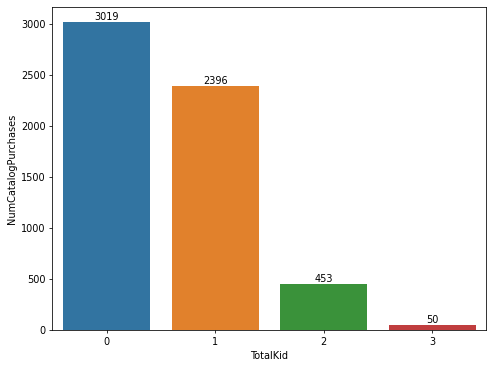

In [628]:
ax = sns.barplot(x = "TotalKid", y = "NumCatalogPurchases", estimator=np.sum, data = df, ci = None)

for i in ax.containers :
    plt.bar_label(i)

**Catalog alışverişlerine Hiç cocugu olmayan aileler daha cok onem gostermiştir**

In [629]:
df.TotalKid.value_counts() / df.groupby("TotalKid").NumCatalogPurchases.sum() * 100

0     20.967208
1     46.577629
2     91.832230
3    100.000000
dtype: float64

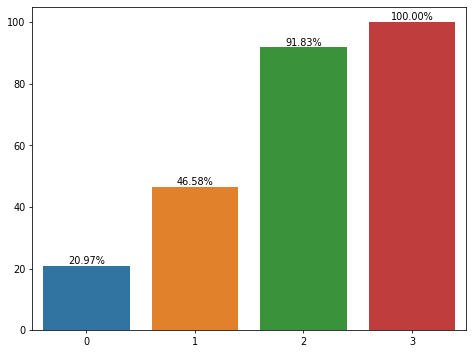

In [630]:
ax = sns.barplot(x = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumCatalogPurchases.sum() * 100).index,
            y = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumCatalogPurchases.sum() * 100).values)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")

**Katolog alışverişler oranları çocuk sayısı arttıkca cok daha fazla ılgı gormustur**

In [631]:
df.groupby("TotalKid").NumStorePurchases.sum()

TotalKid
0    4599
1    6264
2    1801
3     188
Name: NumStorePurchases, dtype: int64

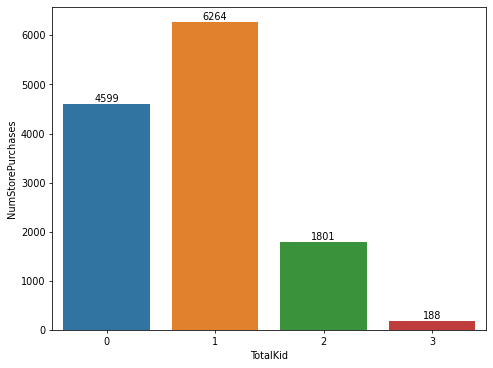

In [632]:
ax = sns.barplot(x = "TotalKid", y = "NumStorePurchases", estimator=np.sum, data = df, ci = None)

for i in ax.containers :
    plt.bar_label(i)

**Store alışverişlerine 1 cocugu olan aileler daha cok onem gostermiştir**

In [633]:
df.TotalKid.value_counts() / df.groupby("TotalKid").NumStorePurchases.sum() * 100

0    13.763862
1    17.816092
2    23.098279
3    26.595745
dtype: float64

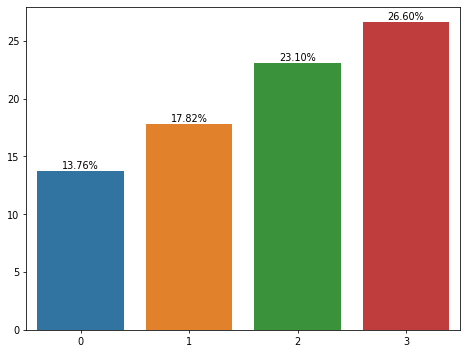

In [634]:
ax = sns.barplot(x = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumStorePurchases.sum() * 100).index,
            y = (df.TotalKid.value_counts() / df.groupby("TotalKid").NumStorePurchases.sum() * 100).values)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")

**Store alışverişler oranları çocuk sayısı arttıkca cok daha fazla ılgı gormustur**

# MntWines 

In [635]:
df.MntWines.sum()

676074

In [636]:
df.MntWines.sum() / df.MntTotal.sum() * 100

50.2576164291709

**Yapılan Harcalamaların %50'si şaraplara gitmiştir**

# MntFruits

In [637]:
df.MntFruits.sum()

58391

In [638]:
df.MntFruits.sum() / df.MntTotal.sum() * 100

4.3406379788539695

**Yapılan Harcalamaların %4'ü meyvelere gitmiştir**

# MntMeatProducts

In [639]:
df.MntMeatProducts.sum()

370045

In [640]:
df.MntMeatProducts.sum() / df.MntTotal.sum() * 100

27.508201279050148

**Yapılan Harcalamaların %27'si meyvelere gitmiştir**

# MntFishProducts 

In [641]:
df.MntFishProducts.sum()

83397

In [642]:
df.MntFishProducts.sum() / df.MntTotal.sum() * 100

6.199520226104785

**Yapılan Harcalamaların %6'si balıklara gitmiştir**

# MntSweetProducts

In [643]:
df.MntSweetProducts.sum()

59895

In [644]:
df.MntSweetProducts.sum() / df.MntTotal.sum() * 100

4.452441502003023

**Yapılan Harcalamaların %4'ü tatlılara gitmiştir**

# MntGoldProds

In [645]:
df.MntGoldProds.sum()

97415

In [646]:
df.MntGoldProds.sum() / df.MntTotal.sum() * 100

7.24158258481717

**Yapılan Harcalamaların %7'si tatlılara gitmiştir**

# MntTotal

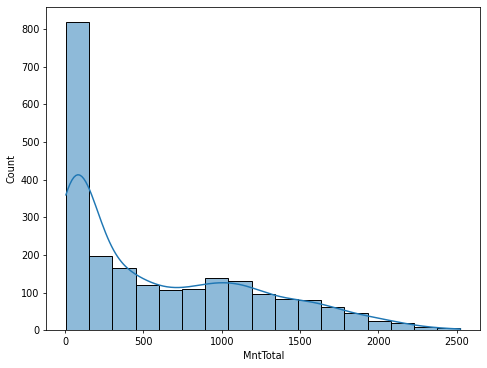

In [647]:
sns.histplot(df.MntTotal, kde = True);

**Beklenildiği gibi toplam alışveriş tutarları arttıkca sayı azalmaktadır**

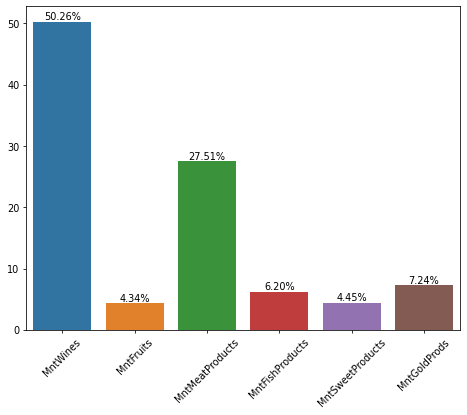

In [648]:
ax = sns.barplot(x = (df[df.columns[df.columns.str.match("Mnt")]].sum()[:-1] / df.MntTotal.sum() * 100).index,
            y = (df[df.columns[df.columns.str.match("Mnt")]].sum()[:-1] / df.MntTotal.sum() * 100).values,
            ci = None)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")
plt.xticks(rotation = 45);

**Tek bir tobloda ürünlerin satın alınma oranları**

# Total_Cmp

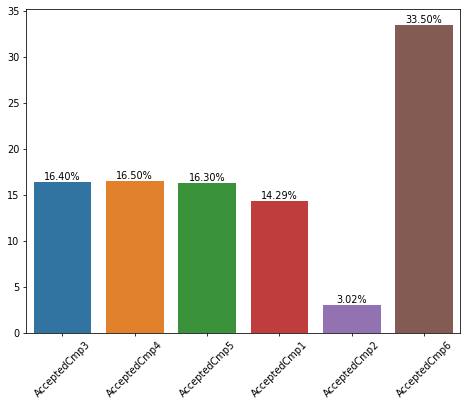

In [656]:
ax = sns.barplot(x = (df[df.columns[df.columns.str.contains("Cmp")]].sum()[:-1] / df.Total_Cmp.sum() * 100).index,
            y = (df[df.columns[df.columns.str.contains("Cmp")]].sum()[:-1] / df.Total_Cmp.sum() * 100).values,
            ci = None)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.2f%%")
plt.xticks(rotation = 45);

**Görüyoruz en fazla son kampanyaya katılım olmuş**

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   int64  
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   i